# Importing libraries

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep

# Importing files

In [27]:
songs_df = pd.read_csv('songs_df.csv')
top_hits = pd.read_csv('top_hits.csv')

pd.set_option('display.max_columns', None)

In [215]:
songs_df.head()

,song_title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Mary On A Cross,Ghost,0.466,0.900,11,-4.469,1,0.0447,0.000235,0.00104,0.1030,0.561,130.020,audio_features,2HZLXBOnaSRhXStMLrq9fD,spotify:track:2HZLXBOnaSRhXStMLrq9fD,https://api.spotify.com/v1/tracks/2HZLXBOnaSRh...,https://api.spotify.com/v1/audio-analysis/2HZL...,244804,4
1,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,0.625,0.533,10,-11.903,0,0.0596,0.659000,0.00266,0.0546,0.139,108.296,audio_features,29d0nY7TzCoi22XBqDQkiP,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840,4
2,Nomatterday,Pixies,0.275,0.884,9,-3.814,0,0.0775,0.000043,0.04620,0.3320,0.472,149.923,audio_features,5SIuyYZIVW9WU90puvFG1x,spotify:track:5SIuyYZIVW9WU90puvFG1x,https://api.spotify.com/v1/tracks/5SIuyYZIVW9W...,https://api.spotify.com/v1/audio-analysis/5SIu...,251451,4
3,Can't Stop,Red Hot Chili Peppers,0.618,0.938,9,-3.442,1,0.0456,0.017900,0.00000,0.1670,0.875,91.455,audio_features,3ZOEytgrvLwQaqXreDs2Jx,spotify:track:3ZOEytgrvLwQaqXreDs2Jx,https://api.spotify.com/v1/tracks/3ZOEytgrvLwQ...,https://api.spotify.com/v1/audio-analysis/3ZOE...,269000,4
4,The Middle,Jimmy Eat World,0.643,0.849,2,-5.428,1,0.0526,0.037100,0.00000,0.0580,0.903,162.152,audio_features,6GG73Jik4jUlQCkKg9JuGO,spotify:track:6GG73Jik4jUlQCkKg9JuGO,https://api.spotify.com/v1/tracks/6GG73Jik4jUl...,https://api.spotify.com/v1/audio-analysis/6GG7...,165853,4


In [36]:
X_cat = songs_df[['song_title','artist']]

In [30]:
X = songs_df.select_dtypes(np.number)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.466,0.900,11,-4.469,1,0.0447,0.000235,0.00104,0.1030,0.561,130.020,244804,4
1,0.625,0.533,10,-11.903,0,0.0596,0.659000,0.00266,0.0546,0.139,108.296,300840,4
2,0.275,0.884,9,-3.814,0,0.0775,0.000043,0.04620,0.3320,0.472,149.923,251451,4
3,0.618,0.938,9,-3.442,1,0.0456,0.017900,0.00000,0.1670,0.875,91.455,269000,4
4,0.643,0.849,2,-5.428,1,0.0526,0.037100,0.00000,0.0580,0.903,162.152,165853,4


In [31]:
X_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(X_scaled,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.715983,0.905063,1.588839,0.710203,0.759505,-0.515449,-0.773491,-0.572503,-0.579494,0.343740,0.253159,0.321767,0.171214
1,0.250987,-0.537025,1.311029,-0.903743,-1.316646,-0.348708,1.336872,-0.567669,-0.887187,-1.375784,-0.469364,0.987569,0.171214
2,-1.877563,0.842193,1.033219,0.852405,-1.316646,-0.148395,-0.774107,-0.437772,0.876328,-0.018908,0.915117,0.400744,0.171214
3,0.208416,1.054381,1.033219,0.933168,0.759505,-0.505377,-0.716901,-0.575605,-0.172627,1.623197,-1.029482,0.609256,0.171214
4,0.360455,0.704664,-0.911454,0.502001,0.759505,-0.427043,-0.655394,-0.575605,-0.865572,1.737289,1.321843,-0.616305,0.171214


In [233]:
X_minmax = MinMaxScaler().fit(X).transform(X)
pd.DataFrame(X_minmax,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.473096,0.900,1.000000,0.865751,1.0,0.047053,0.000236,0.001041,0.103831,0.561,0.532238,0.047425,0.8
1,0.634518,0.533,0.909091,0.749852,0.0,0.062737,0.661647,0.002663,0.055040,0.139,0.443311,0.058662,0.8
2,0.279188,0.884,0.818182,0.875963,0.0,0.081579,0.000043,0.046246,0.334677,0.472,0.613712,0.048758,0.8
3,0.627411,0.938,0.818182,0.881762,1.0,0.048000,0.017972,0.000000,0.168347,0.875,0.374372,0.052277,0.8
4,0.652792,0.849,0.181818,0.850800,1.0,0.055368,0.037249,0.000000,0.058468,0.903,0.663771,0.031594,0.8


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

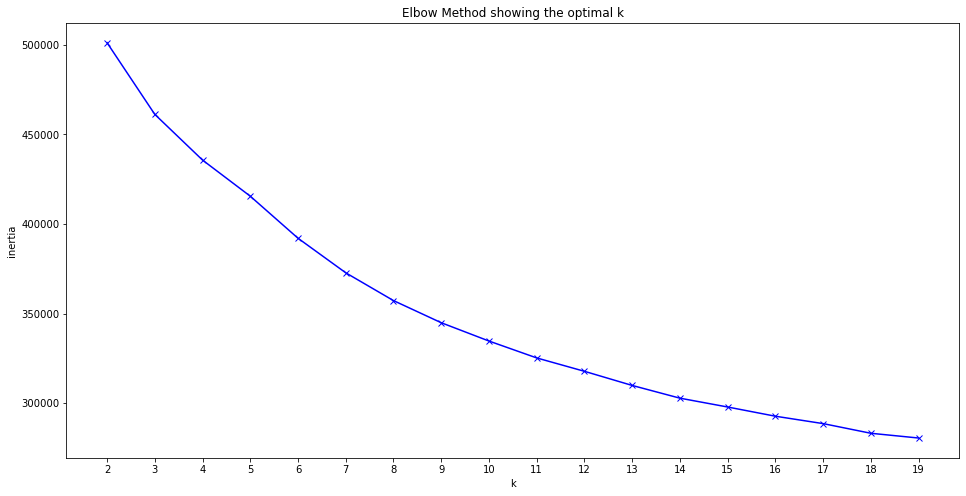

In [32]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

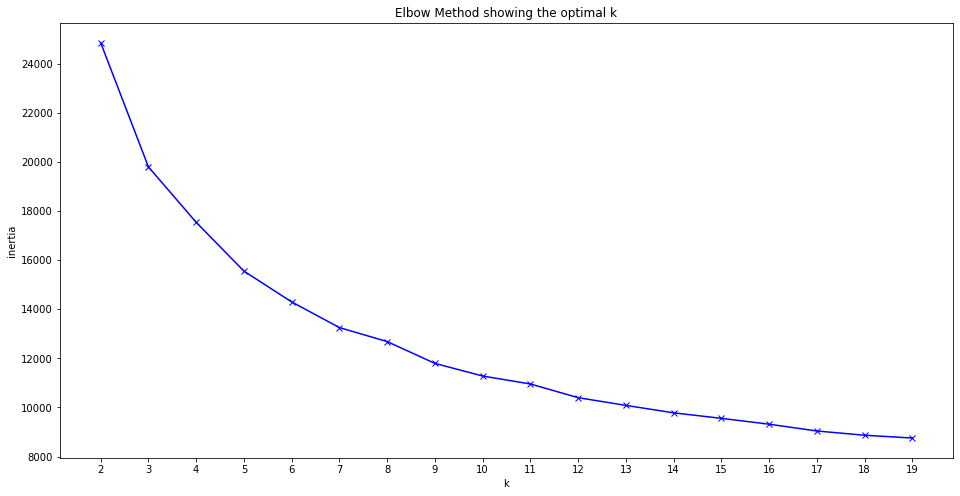

In [60]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_minmax)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

CPU times: total: 12min 12s
Wall time: 5min 54s


Text(0.5, 1.0, 'Silhouette score showing the optimal k')

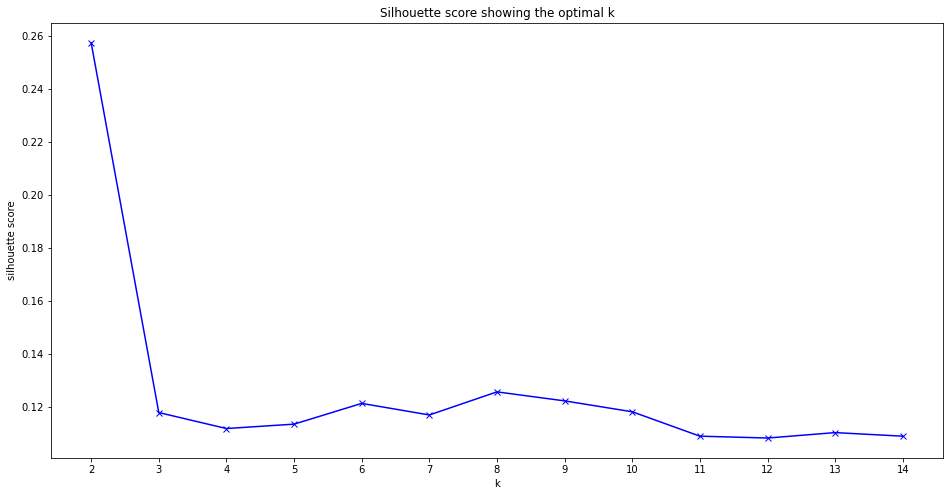

In [37]:
%%time

K = range(2, 15)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

CPU times: total: 11min 51s
Wall time: 5min 44s


Text(0.5, 1.0, 'Silhouette score showing the optimal k')

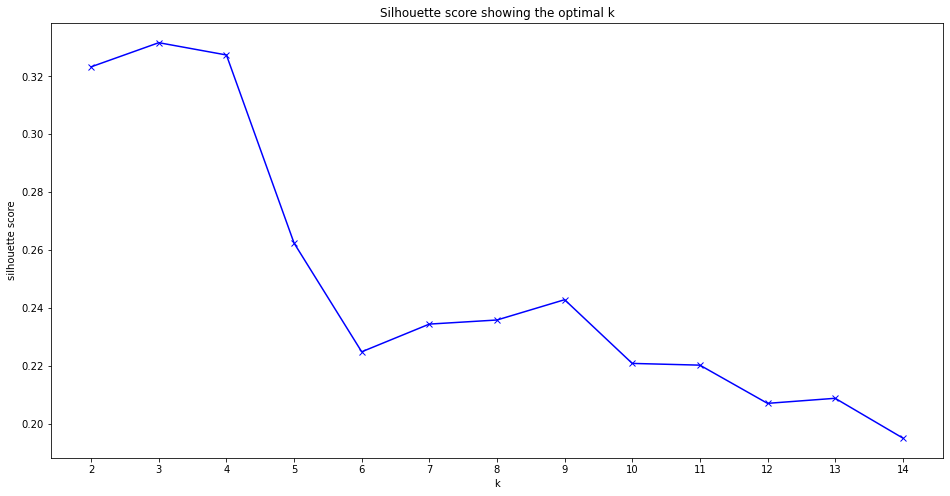

In [62]:
%%time

K = range(2, 15)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_minmax)
    silhouette.append(silhouette_score(X_minmax, kmeans.predict(X_minmax)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

### I choose 8 clusters with the standard scaled data so I'm going to apply K-Means

In [118]:
kmeans8 = KMeans(n_clusters=8)
kmeans8.fit(X_scaled)

KMeans()

In [119]:
# Assigning the clusters:
clusters8 = kmeans8.predict(X_scaled)

# Check the size of the clusters
pd.Series(clusters8).value_counts().sort_index()

0    11234
1     5922
2     9184
3     1946
4     2706
5     4476
6     2824
7     8840
dtype: int64

### I choose 9 clusters with the MinMax scaled data so I'm going to apply K-Means

In [224]:
kmeans9 = KMeans(n_clusters=9)
kmeans9.fit(X_minmax)

KMeans(n_clusters=9)

In [225]:
# Assigning the clusters:
clusters = kmeans9.predict(X_minmax)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2554
1    7192
2    8885
3    3247
4    6361
5    5619
6    3689
7    5785
8    3800
dtype: int64

In [216]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X_minmax)

KMeans(n_clusters=4)

In [217]:
# Assigning the clusters:
clusters4 = kmeans4.predict(X_minmax)

# Check the size of the clusters
pd.Series(clusters4).value_counts().sort_index()

0    13249
1     7079
2    22811
3     3993
dtype: int64

## Visualizing the clusters  with PCA

### With the standard scaler

In [103]:
from sklearn.decomposition import PCA

In [120]:
pca8 = PCA()
pca8.fit(X_scaled)

PCA()

In [121]:
pca8.explained_variance_ratio_.round(2)

array([0.24, 0.12, 0.09, 0.09, 0.07, 0.07, 0.07, 0.06, 0.06, 0.05, 0.04,
       0.02, 0.01])

In [122]:
X_scaled_pca = pca8.transform(X_scaled)

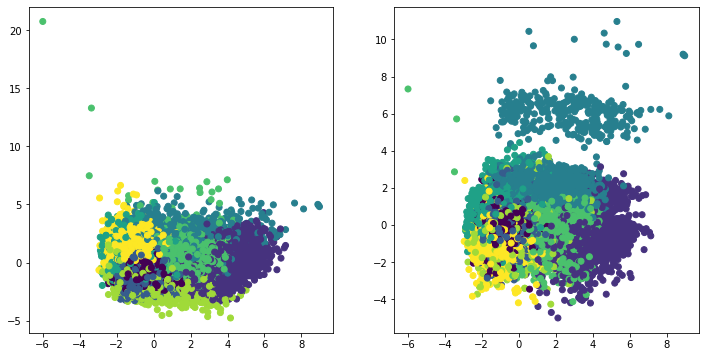

In [124]:
options, charts = plt.subplots(1, 2, figsize=(12, 6))

charts[0].scatter(X_scaled_pca[:,0],X_scaled_pca[:,1], c = clusters8)
charts[1].scatter(X_scaled_pca[:,0],X_scaled_pca[:,5], c = clusters8)
plt.show()

## with the MinMAx Scaler

In [104]:
pca = PCA()
pca.fit(X_minmax)

PCA()

In [105]:
pca.explained_variance_ratio_.round(2)

array([0.31, 0.26, 0.14, 0.09, 0.08, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01,
       0.  , 0.  ])

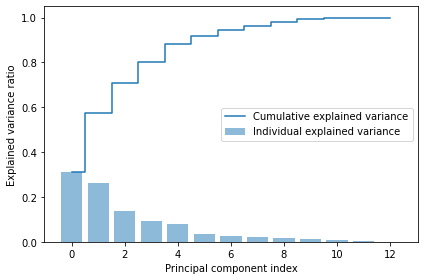

In [106]:

exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [108]:
pca.explained_variance_ratio_[:6].sum()

0.9161145845676446

In [111]:
pca = PCA(0.90)
pca.fit(X_minmax)

PCA(n_components=0.9)

In [112]:
pca.explained_variance_ratio_

array([0.31119006, 0.26266313, 0.13553925, 0.09198661, 0.07949619,
       0.03523933])

In [113]:
X_minmax_pca = pca.transform(X_minmax)

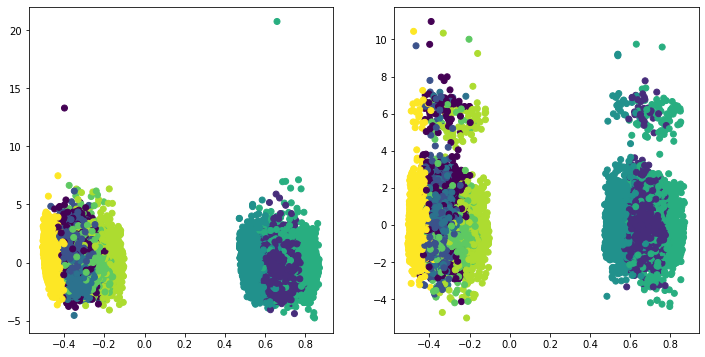

In [221]:

options, charts = plt.subplots(1, 2, figsize=(12, 6))

charts[0].scatter(X_minmax_pca[:,0],X_scaled_pca[:,1], c = clusters)
charts[1].scatter(X_minmax_pca[:,0],X_scaled_pca[:,5], c = clusters)
plt.show()

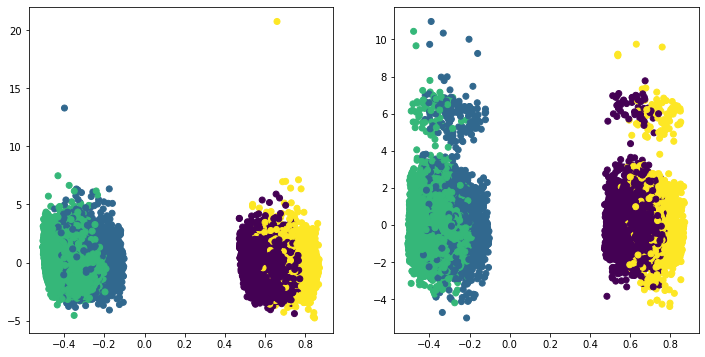

In [220]:

options, charts = plt.subplots(1, 2, figsize=(12, 6))

charts[0].scatter(X_minmax_pca[:,0],X_scaled_pca[:,1], c = clusters4)
charts[1].scatter(X_minmax_pca[:,0],X_scaled_pca[:,5], c = clusters4)
plt.show()

In [223]:
# I don't know if I have now to make another column giving the number of the cluster each song belongs
# or maybe I think I missed something regarding the K-Means to check where would belong the next song
# but I'll ask tomorrow in class because I'm not sure what I'm missing

## Defining the pipeline to get info from spotify

1. input a song
2. check if it is inside top_hits
    * if it is -> recommend another top_hits
3. if it is not a top hit -> search in spotify
4. get the title-artist-uri
5. extract audio features
6. classify them into one of the clusters
7. recommend another song from that cluster

In [64]:
# input a song
song = input("What's your favourite song?  ")


In [ ]:

# check if it is inside top_hits
if song in top_hits['title'].values:
    
    # if it is -> recommend another top_hits
    print('Maybe this song will also like you! :  ' + random.choice(top_hits['title'].values))
    
# if it is not a top hit -> search in spotify    
else:
    secrets_file = open("secrets.txt","r")
    string = secrets_file.read()
    secrets_dict={}                            # I don't know if I have to take this lines out the function or let them in
    for line in string.split('\n'):
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],

# getting th info of the song from spotify
    results = sp.search(q=song, type='track', limit=1)client_secret=secrets_dict['csecret']))
    
# get the title-artist-uri
    artist = results['tracks']['items'][0]['artists'][0]['name']
    uri = results['tracks']['items'][0]['uri']

# extract audio features
    audio = sp.audio_features(uri)
    
    # creating df with the info of this song
    df = pd.DataFrame({'song_title':song,'artist':artist,'audio_features':audio})
    
    # extracting dictionary and rearraging columns
    flattened = pd.DataFrame(dict(df['audio_features'])).transpose()
    list_features = ['danceability','energy','key','loudness','speechiness','instrumentalness','liveness','valence','tempo','time_signature']
    flattened = flattened[list_features]
    
    # creating new df complete
    df = pd.concat([df, flattened], axis=1)
    df = data.drop(['audio_features'], axis=1)
    
    # separate them into cat and num
    df_num = df.dtypes(np.number)
    df_cat = df.dtypes('object')
    
    # scale the numerical values 
    df_minmax = MinMaxScaler().transform(df_num)
    
    
# classify them into one of the clusters
    # I don't know how to do this

# recommend another song from that cluster
    print('Maybe you will like this song too! :  ' + random.choice())



In [229]:
dff

,song_title,artist,audio_features
0,Unholy,Sam Smith,"{'danceability': 0.714, 'energy': 0.472, 'key'..."


In [230]:

    list_features = ['danceability','energy','key','loudness','speechiness','instrumentalness','liveness','valence','tempo','time_signature']
    dfff = dfff[list_features]
    dfff 

,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,valence,tempo,time_signature
0,0.714,0.472,2,-7.375,0.0864,0.000005,0.266,0.238,131.121,4


In [231]:
    df = pd.concat([dff, dfff], axis=1)
    df = df.drop(['audio_features'], axis=1)
    df

,song_title,artist,danceability,energy,key,loudness,speechiness,instrumentalness,liveness,valence,tempo,time_signature
0,Unholy,Sam Smith,0.714,0.472,2,-7.375,0.0864,0.000005,0.266,0.238,131.121,4


In [236]:
X_minmax = MinMaxScaler().fit(X).transform(X)
pd.DataFrame(X_minmax,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.473096,0.900,1.000000,0.865751,1.0,0.047053,0.000236,0.001041,0.103831,0.561,0.532238,0.047425,0.8
1,0.634518,0.533,0.909091,0.749852,0.0,0.062737,0.661647,0.002663,0.055040,0.139,0.443311,0.058662,0.8
2,0.279188,0.884,0.818182,0.875963,0.0,0.081579,0.000043,0.046246,0.334677,0.472,0.613712,0.048758,0.8
3,0.627411,0.938,0.818182,0.881762,1.0,0.048000,0.017972,0.000000,0.168347,0.875,0.374372,0.052277,0.8
4,0.652792,0.849,0.181818,0.850800,1.0,0.055368,0.037249,0.000000,0.058468,0.903,0.663771,0.031594,0.8


In [237]:
df_minmax = MinMaxScaler().transform(dfff)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

I don't understand this error....

In [ ]:
# Assigning the clusters:
clusters = kmeans9.predict(X_minmax)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()